In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap 

In [22]:
# exercicio 01
data = {
    'Potência (kW)': [120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
    'Eficiência (%)': [92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
    'Idade (anos)': [3, 8, 5, 4, 7, 2, 10, 6, 3, 9],
    'Tamanho (m²)': [50, 45, 55, 60, 48, 62, 40, 58, 56, 47],
    'Consumo de Energia': ['Eficiente', 'Ineficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 
                           'Eficiente', 'Ineficiente', 'Eficiente', 'Eficiente', 'Ineficiente']
}


In [23]:
df = pd.DataFrame(data)

In [24]:
df['Consumo de Energia'] = df['Consumo de Energia'].map({'Eficiente': 1, 'Ineficiente': 0})

In [25]:
X = df.drop('Consumo de Energia', axis=1).values
y = df['Consumo de Energia'].values
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=3)

In [27]:
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

In [29]:
modelo = SVC(kernel='linear', random_state=3)
modelo.fit(X_treino, y_treino)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [30]:
y_prev = modelo.predict(X_teste)

In [31]:
cm = confusion_matrix(y_teste, y_prev)
acc = accuracy_score(y_teste, y_prev)
prec = precision_score(y_teste, y_prev)
recall = recall_score(y_teste, y_prev)
f1 = f1_score(y_teste, y_prev)

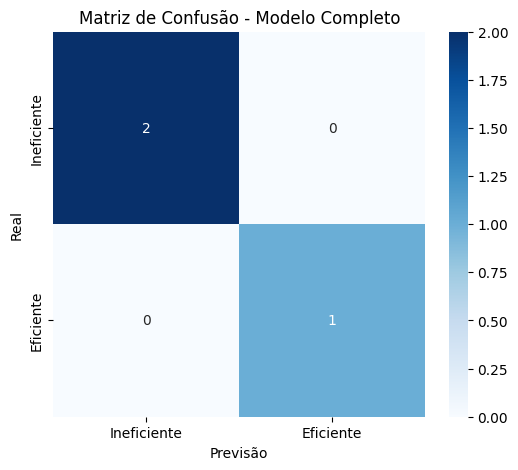

In [32]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ineficiente', 'Eficiente'],
            yticklabels=['Ineficiente', 'Eficiente'])
plt.title("Matriz de Confusão - Modelo Completo")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.show()

In [33]:
X_vis = df[['Potência (kW)', 'Eficiência (%)']].values
y_vis = df['Consumo de Energia'].values

In [34]:
X_treino_vis, X_teste_vis, y_treino_vis, y_teste_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=3)
sc_vis = StandardScaler()
X_treino_vis = sc_vis.fit_transform(X_treino_vis)
X_teste_vis = sc_vis.transform(X_teste_vis)

In [35]:
modelo_vis = SVC(kernel='linear')
modelo_vis.fit(X_treino_vis, y_treino_vis)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


C:\Users\dsadm\AppData\Local\Temp\ipykernel_14540\1883499758.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_treino_vis[y_treino_vis == j, 0], X_treino_vis[y_treino_vis == j, 1],


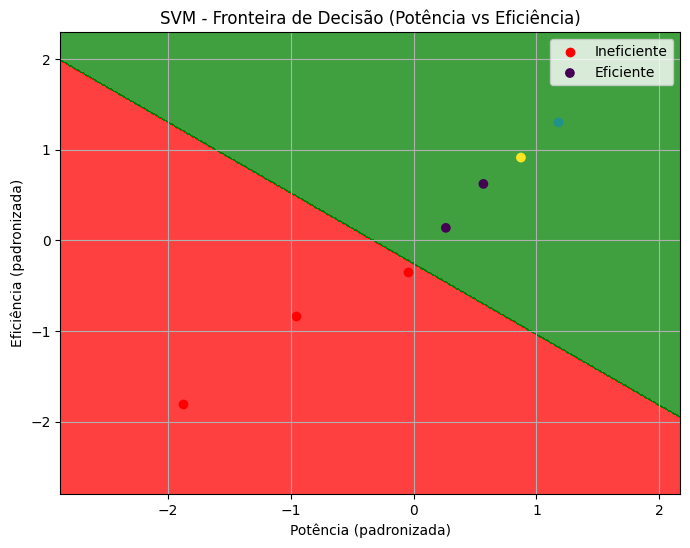

In [36]:
plt.figure(figsize=(8, 6))
X1, X2 = np.meshgrid(
    np.arange(start=X_treino_vis[:, 0].min() - 1, stop=X_treino_vis[:, 0].max() + 1, step=0.01),
    np.arange(start=X_treino_vis[:, 1].min() - 1, stop=X_treino_vis[:, 1].max() + 1, step=0.01)
)
plt.contourf(X1, X2, modelo_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_treino_vis)):
    plt.scatter(X_treino_vis[y_treino_vis == j, 0], X_treino_vis[y_treino_vis == j, 1],
                c=ListedColormap(('red', 'green'))(i), label='Eficiente' if j == 1 else 'Ineficiente')
plt.title('SVM - Fronteira de Decisão (Potência vs Eficiência)')
plt.xlabel('Potência (padronizada)')
plt.ylabel('Eficiência (padronizada)')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
# exercicio 02
dados = {
    'pH': [3.0, 5.5, 2.5, 7.0, 4.0, 6.5, 1.5, 6.0, 2.0, 5.0, 4.5, 2.8, 1.0, 8.0],
    'Concentracao': ['Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada',
                     'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Concentrada', 'Diluída', 'Diluída'],
    'Cheiro': ['Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro',
               'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Sem Cheiro'],
    'Classe': ['Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida',
               'Básica', 'Ácida', 'Básica', 'Ácida', 'Ácida', 'Básica', 'Básica']
}

In [38]:
df = pd.DataFrame(dados)

In [ ]:
le = LabelEncoder()
df['Concentracao'] = le.fit_transform(df['Concentracao']) 
df['Cheiro'] = le.fit_transform(df['Cheiro'])             
df['Classe'] = le.fit_transform(df['Classe']) 

In [40]:
X = df[['pH', 'Concentracao', 'Cheiro']].values
Y = df[['Classe']].values

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3, random_state=3)

In [42]:
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

In [43]:
algoritmo = SVC(kernel='linear', random_state=3)
algoritmo.fit(X_treino, Y_treino.ravel())

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:
y_prev = algoritmo.predict(X_teste)

In [45]:
cm = confusion_matrix(Y_teste, y_prev)
acc = accuracy_score(Y_teste, y_prev)
prec = precision_score(Y_teste, y_prev)
recall = recall_score(Y_teste, y_prev)
f1score = f1_score(Y_teste, y_prev)

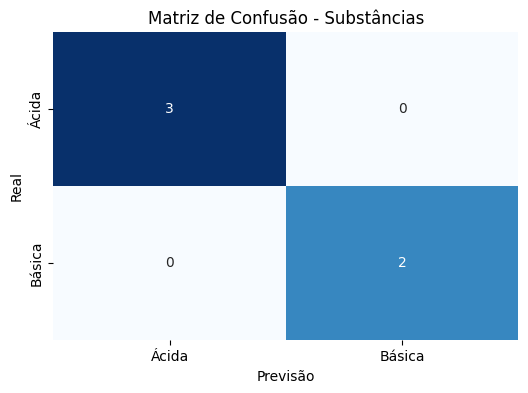

In [46]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ácida', 'Básica'],
            yticklabels=['Ácida', 'Básica'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Substâncias')
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_14540\2629646362.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_Y == j, 0], _X[_Y == j, 1],


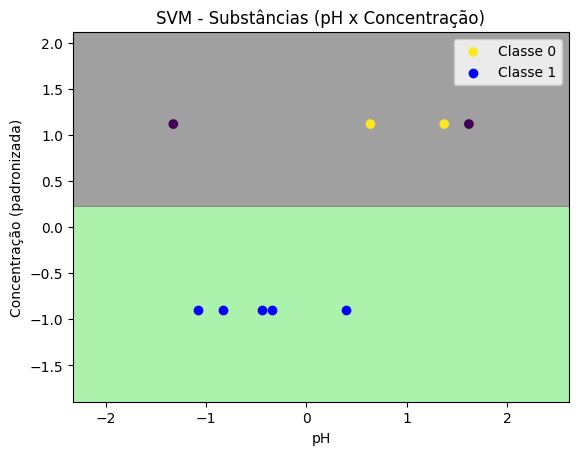

In [47]:
_X, _Y = X_treino[:, [0, 1]], Y_treino.ravel()
X1, X2 = np.meshgrid(
    np.arange(start=_X[:, 0].min() - 1, stop=_X[:, 0].max() + 1, step=0.01),
    np.arange(start=_X[:, 1].min() - 1, stop=_X[:, 1].max() + 1, step=0.01)
)
plt.contourf(X1, X2, algoritmo.predict(np.c_[X1.ravel(), X2.ravel(), np.zeros_like(X1.ravel())]).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('gray', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_Y)):
    plt.scatter(_X[_Y == j, 0], _X[_Y == j, 1],
                c=ListedColormap(('red', 'blue'))(i), label=f"Classe {j}")
plt.title('SVM - Substâncias (pH x Concentração)')
plt.xlabel('pH')
plt.ylabel('Concentração (padronizada)')
plt.legend()
plt.show()

In [48]:
# exercicio 03
url = "https://raw.githubusercontent.com/danielvieira95/Inteligencia_Artificial_2025/refs/heads/main/bases_de_dados/dadosclientes.csv"
df = pd.read_csv(url)

In [49]:
X = df[['Valor_compra', 'qtde_produtos']].values
Y = df['forma_pag'].values

In [50]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3, random_state=3)

In [51]:
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

In [52]:
algoritmo = SVC(kernel='linear', random_state=3)
algoritmo.fit(X_treino, Y_treino)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [53]:
y_prev = algoritmo.predict(X_teste)

In [54]:
cm = confusion_matrix(Y_teste, y_prev)
acc = accuracy_score(Y_teste, y_prev)
prec = precision_score(Y_teste, y_prev)
recall = recall_score(Y_teste, y_prev)
f1score = f1_score(Y_teste, y_prev)

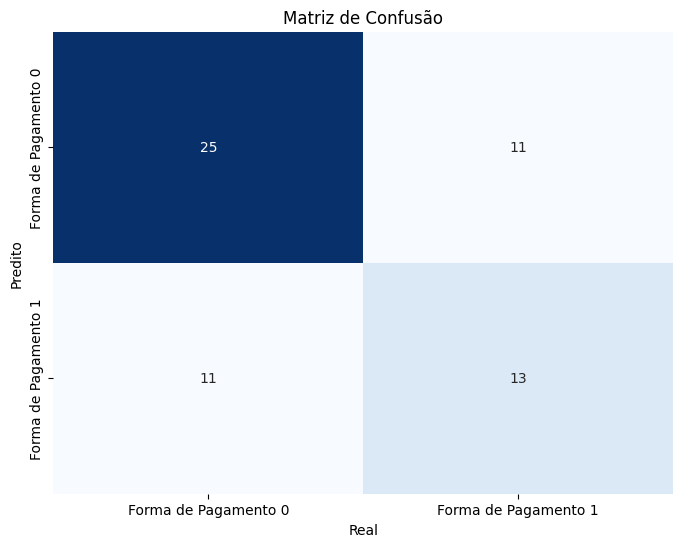

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Forma de Pagamento 0', 'Forma de Pagamento 1'],
            yticklabels=['Forma de Pagamento 0', 'Forma de Pagamento 1'])
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Matriz de Confusão')
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_14540\2968609856.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_Y == j, 0], _X[_Y == j, 1], c=ListedColormap(('red', 'blue'))(i), label=f'Classe {j}')


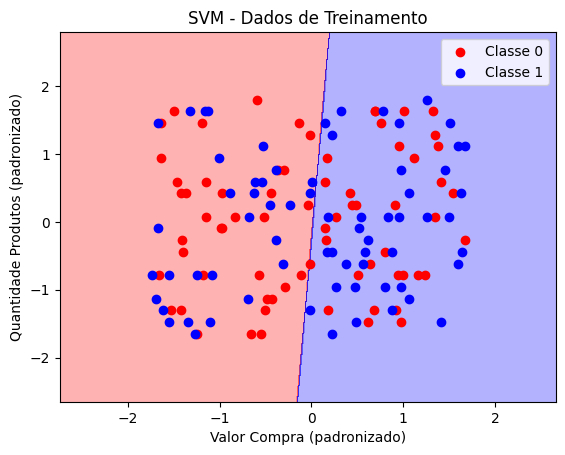

In [56]:
_X, _Y = X_treino, Y_treino
X1, X2 = np.meshgrid(
    np.arange(start=_X[:, 0].min() - 1, stop=_X[:, 0].max() + 1, step=0.01),
    np.arange(start=_X[:, 1].min() - 1, stop=_X[:, 1].max() + 1, step=0.01)
)
plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.3, cmap=ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(_Y)):
    plt.scatter(_X[_Y == j, 0], _X[_Y == j, 1], c=ListedColormap(('red', 'blue'))(i), label=f'Classe {j}')

plt.title('SVM - Dados de Treinamento')
plt.xlabel('Valor Compra (padronizado)')
plt.ylabel('Quantidade Produtos (padronizado)')
plt.legend()
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_14540\1825559950.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_Y == j, 0], _X[_Y == j, 1], c=ListedColormap(('red', 'blue'))(i), label=f'Classe {j}')


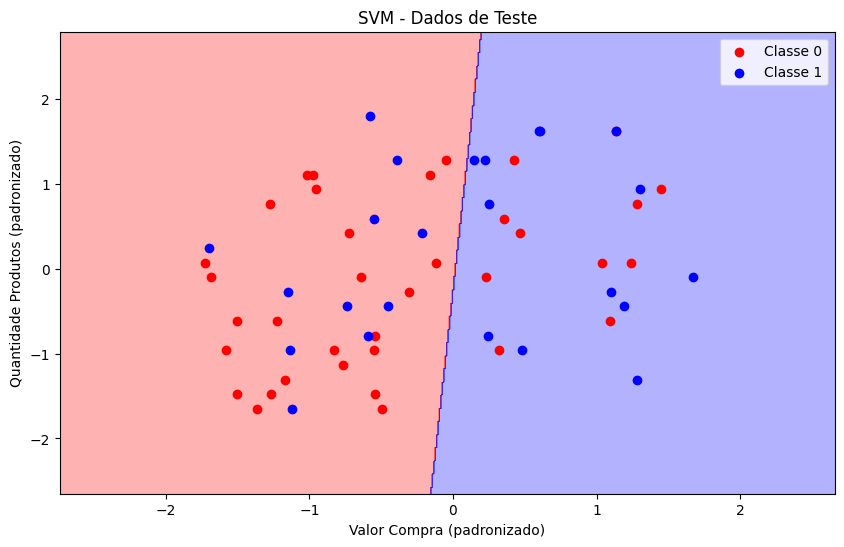

In [57]:
_X, _Y = X_teste, Y_teste
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.3, cmap=ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(_Y)):
    plt.scatter(_X[_Y == j, 0], _X[_Y == j, 1], c=ListedColormap(('red', 'blue'))(i), label=f'Classe {j}')

plt.title('SVM - Dados de Teste')
plt.xlabel('Valor Compra (padronizado)')
plt.ylabel('Quantidade Produtos (padronizado)')
plt.legend()
plt.show()
